# Regression between sea level height and the timmerman wind data regions for observational data

This regression can either be performed using observational or model (cmip6) data.
When observational or cmip6 data is used, functions containing respectively 'obs' or 'cmip6' should be used.


For each sea level datapoint, a wind stress data point located nearest to the sea level point to perform a regression.

In this notebook, functions are used from: 

'/code/import_data.py' 

'/code/regression.py' 

'/code/figures.py' 

In [196]:
%load_ext autoreload
%autoreload 2

from code import import_data as imprt
from code import regression as regres
from code import figures as figs

data_type = 'era5'
model = 'Timmerman'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Import and plot tide gauge data

In [197]:
# Open data file
tg_data = imprt.import_obs_slh_data()

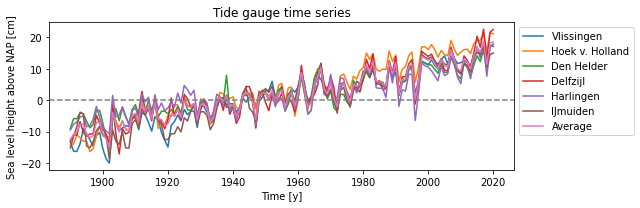

In [198]:
figs.plot_tg_data(tg_data)

#### Import and plot nearby wind data

In [199]:
wind_data_era5 = imprt.import_obs_wind_data(model = model, data_type = data_type)

In [200]:
wind_data_era5

Channel                South             Mid-West            \
          u$^2$     v$^2$      u$^2$     v$^2$      u$^2$     v$^2$   
time                                                                  
1950  12.316069  2.160256   8.262183  4.041305   8.584405  4.609705   
1951   9.091509  3.399517   4.721186  6.609374   6.462471  7.438522   
1952   7.544790 -0.726687   5.772462  0.936855   7.444201 -0.193246   
1953   4.353734  0.893492   5.077993  2.553824   7.646784  3.443362   
1954  13.225689  0.533389  13.136430  2.714039  13.472046  3.240453   
...         ...       ...        ...       ...        ...       ...   
2016   7.010372  1.776007   4.492962  3.094546   5.532615  3.626648   
2017  11.630273  0.406660  10.108109  2.040739  13.155661  2.520331   
2018   5.153245  1.826134   3.098964  2.625134   4.536352  4.291521   
2019   8.473024  1.723831   6.476494  4.163897   8.741339  4.177894   
2020  12.528422  2.871880  10.073592  6.292929  12.320718  6.441253   

       Mid-East           North-West           North-East            
          u$^2$     v$^2$      u$^2$     v$^2$      u$^2$     v$^2$  
time                                                                 
1950   8.101027  2.522368   7.013565  7.557420   3.966120  5.114803  
1951   6.362149  5.580308   5.833830  9.635615   2.495143  9.697726  
1952   8.791636 -0.327027   7.919094 -1.071391   5.063189  0.183969  
1953   9.280859  2.147830   8.386577  5.926245   6.164338  4.168941  
1954  10.562153  4.062375   8.128158  4.496390   3.436815  5.024040  
...         ...       ...        ...       ...        ...       ...  
2016   6.214812  2.229459   6.361533  4.413408   3.943893  3.580360  
2017  14.493663  1.323550  13.115123  2.379122   9.857128  1.494243  
2018   3.704020  2.986358   3.926987  7.248913   1.361824  5.408401  
2019   9.809879  2.972926   6.251465  3.867711   3.540207  2.265945  
2020  13.922107  5.687397  12.519497  7.455038  10.459797  5.902577  

[71 rows x 12 columns]

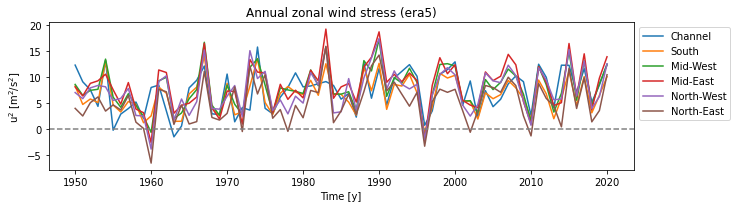

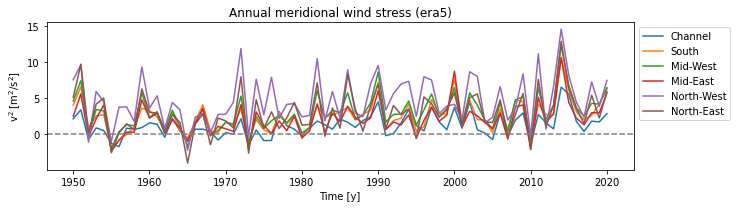

In [201]:
figs.plot_obs_wind_data(wind_data_era5, model = model, data_type = data_type)

### Perform regression

In [202]:
results_era5, timeseries_era5, significance_era5 = regres.regression_obs(wind_data_era5, tg_data, wind_model = model, data_type = data_type)

In [203]:
results_era5

,R$^2$,R$^2_{wind}$,R$^2_{u^2}$,R$^2_{v^2}$,RMSE,constant,Channel u$^2$,Channel v$^2$,South u$^2$,South v$^2$,Mid-West u$^2$,Mid-West v$^2$,Mid-East u$^2$,Mid-East v$^2$,North-West u$^2$,North-West v$^2$,North-East u$^2$,North-East v$^2$,trend
station,,,,,,,,,,,,,,,,,,,
Vlissingen,0.839423,0.272697,0.309024,0.010083,2.009081,7.348812,1.274441,-0.000000,-0.857259,0.262112,-0.000000,0.011832,2.247728,-0.140846,1.089501,-1.798195,-2.330010,0.806920,3.817595
Hoek v. Holland,0.906673,0.254226,0.267658,0.000274,2.012509,9.960944,1.077981,0.439501,1.170190,-1.401634,0.000000,1.886608,0.855259,-0.607912,-0.504506,-2.053356,-0.000000,0.666720,5.367475
Den Helder,0.842866,0.443668,0.386072,0.164838,2.066083,6.357774,0.896212,0.465333,0.944219,0.000000,0.000000,0.867870,0.804077,-0.000000,-0.000000,-1.873890,-0.354016,-0.000000,3.319325
Delfzijl,0.853258,0.360149,0.353570,0.064547,2.529109,7.614678,0.643343,0.222891,0.315915,0.556819,0.624743,0.000000,1.209204,-0.000000,0.000000,-0.788639,0.000000,-0.545093,4.652496
Harlingen,0.816524,0.511956,0.495515,0.082622,2.377668,5.832838,1.218802,0.132561,0.722150,0.542723,0.530448,0.000000,0.082365,-0.000000,0.714691,-1.169962,-0.000000,-0.000000,3.076066
IJmuiden,0.813854,0.377433,0.352240,0.092605,2.229281,7.142322,1.191215,0.735692,0.000000,0.000000,0.000000,0.041523,1.413148,-0.000000,0.000000,-1.667195,-0.609956,0.348092,3.463506
Average,0.883492,0.381220,0.383736,0.045213,1.880165,7.376230,1.179884,0.333461,0.144227,0.268330,0.266227,0.023806,1.257049,-0.000000,0.000000,-1.296758,-0.423583,0.000000,3.952454


In [204]:
timeseries_era5

Vlissingen                                                       \
     Channel u$^2$ Channel v$^2$ South u$^2$ South v$^2$ Mid-West u$^2$   
time                                                                      
1950      1.642245          -0.0   -0.445207    0.183839           -0.0   
1951      0.591664          -0.0    0.480966    0.490878            0.0   
1952      0.087733           0.0    0.205997   -0.187330            0.0   
1953     -0.951932           0.0    0.387641    0.005995            0.0   
1954      1.938604           0.0   -1.720101    0.025151           -0.0   
...            ...           ...         ...         ...            ...   
2016     -0.086384          -0.0    0.540660    0.070644            0.0   
2017      1.418808           0.0   -0.928022   -0.055349           -0.0   
2018     -0.691447          -0.0    0.905270    0.014521            0.0   
2019      0.390158          -0.0    0.021853    0.198496           -0.0   
2020      1.711431          -0.0   -0.918994    0.453044           -0.0   

                                                                    \
     Mid-West v$^2$ Mid-East u$^2$ Mid-East v$^2$ North-West u$^2$   
time                                                                 
1950       0.007741      -0.111170      -0.026367        -0.111478   
1951       0.021313      -0.999812      -0.219005        -0.419841   
1952      -0.015302       0.241761       0.153133         0.125212   
1953       0.002145       0.491775      -0.002773         0.247404   
1954       0.001172       1.146572      -0.123382         0.179858   
...             ...            ...            ...              ...   
2016       0.003025      -1.075108      -0.007915        -0.281908   
2017      -0.002283       3.155745       0.049153         1.483366   
2018       0.006215      -2.358232      -0.055597        -0.918257   
2019       0.005669       0.762128      -0.054751        -0.310678   
2020       0.016528       2.863655      -0.225752         1.327680   

                       ...  Average                                           \
     North-West v$^2$  ...    trend     total wind total   Channel     South   
time                   ...                                                     
1950        -1.548895  ... -6.75010 -5.770551   0.979549  1.708641  0.263103   
1951        -2.673892  ... -6.55724 -7.407395  -0.850155  0.990728  0.421605   
1952         3.122170  ... -6.36438 -4.577373   1.787007 -0.323921 -0.226432   
1953        -0.665885  ... -6.17152 -7.504107  -1.332587 -0.953433 -0.059080   
1954         0.108143  ... -5.97866 -2.740325   3.238335  1.648623  0.315142   
...               ...  ...      ...       ...        ...       ...       ...   
2016         0.153065  ...  5.97866  5.474185  -0.504475  0.029290 -0.018642   
2017         1.254292  ...  6.17152  9.943307   3.771788  1.141345  0.099470   
2018        -1.381889  ...  6.36438  3.574256  -2.790123 -0.520577 -0.137439   
2019         0.448469  ...  6.55724  8.203586   1.646347  0.459749  0.199529   
2020        -1.493472  ...  6.75010  9.593102   2.843002  1.918962  0.618406   

                                                             
      Mid-West  Mid-East North-West u$^2$ total v$^2$ total  
time                                                         
1950  0.062402 -0.062172  -1.116977    1.704506   -0.724957  
1951 -0.052143 -0.559148  -1.928262    0.089735   -0.939891  
1952 -0.060187  0.135206   2.251535    0.163180    1.623827  
1953 -0.011538  0.275027  -0.480199   -0.790712   -0.541875  
1954  0.375928  0.641224   0.077987    3.278388   -0.040054  
...        ...       ...        ...         ...         ...  
2016 -0.151103 -0.601257   0.110382   -0.802527    0.298052  
2017  0.347826  1.764861   0.904525    3.100713    0.671075  
2018 -0.211286 -1.318849  -0.996542   -1.940519   -0.849604  
2019  0.068725  0.426222   0.323411    1.009784    0.636563  
2020  0.329860  1.601508  -1.077009    3.088450  

In [205]:
significance_era5

,Vlissingen,Hoek v. Holland,Den Helder,Delfzijl,Harlingen,IJmuiden,Average
reggression_contributor,,,,,,,
Channel u$^2$,True,True,True,True,True,True,True
Channel v$^2$,True,True,True,True,True,True,True
South u$^2$,True,True,True,True,True,True,True
South v$^2$,True,True,True,True,True,True,True
Mid-West u$^2$,True,True,True,True,True,True,True
Mid-West v$^2$,True,True,True,True,True,True,True
Mid-East u$^2$,True,True,True,True,True,True,True
Mid-East v$^2$,True,True,True,True,True,True,True
North-West u$^2$,True,True,True,True,True,True,True


#### Plot regression results

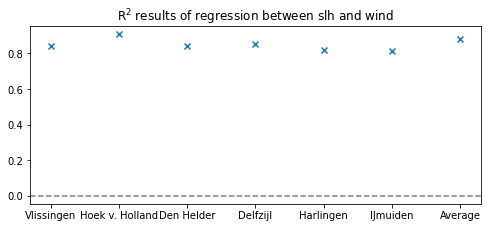

In [206]:
figs.plot_obs_result_per_station(results_era5, 'R$^2$', model, data_type)

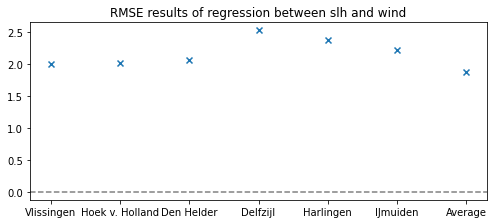

In [207]:
figs.plot_obs_result_per_station(results_era5, 'RMSE', model, data_type)

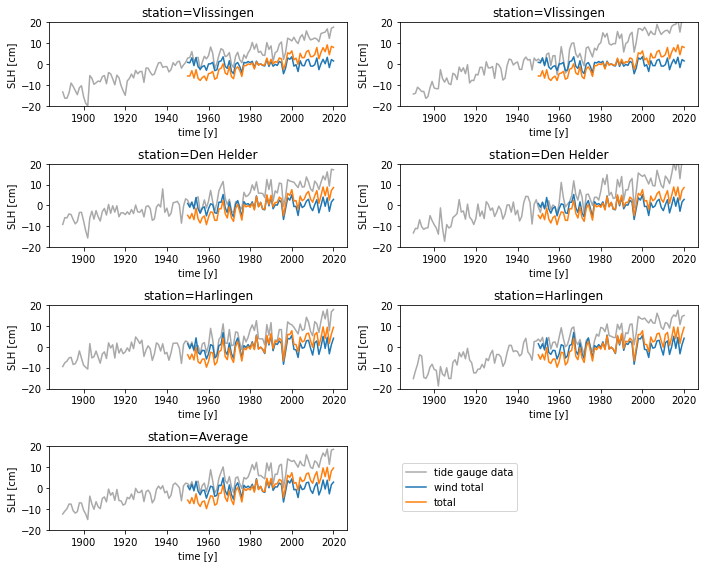

In [208]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_era5, ['wind total', 'total'], model, data_type)

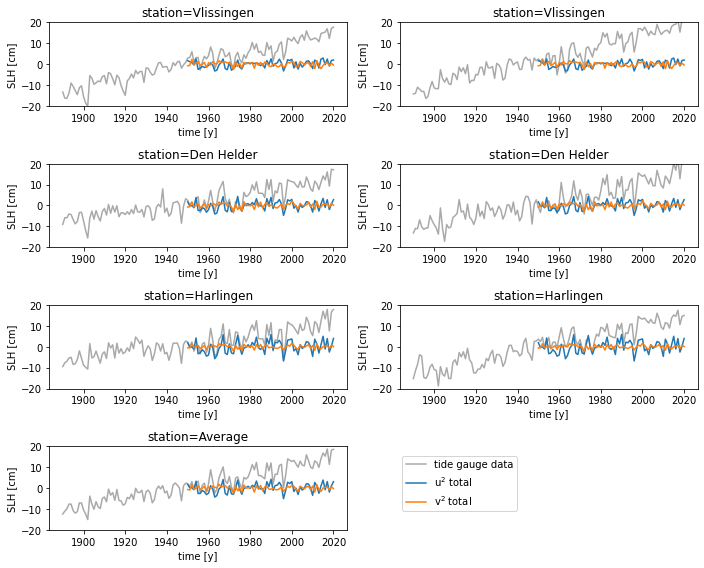

In [209]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_era5, ['u$^2$ total', 'v$^2$ total'], model, data_type)

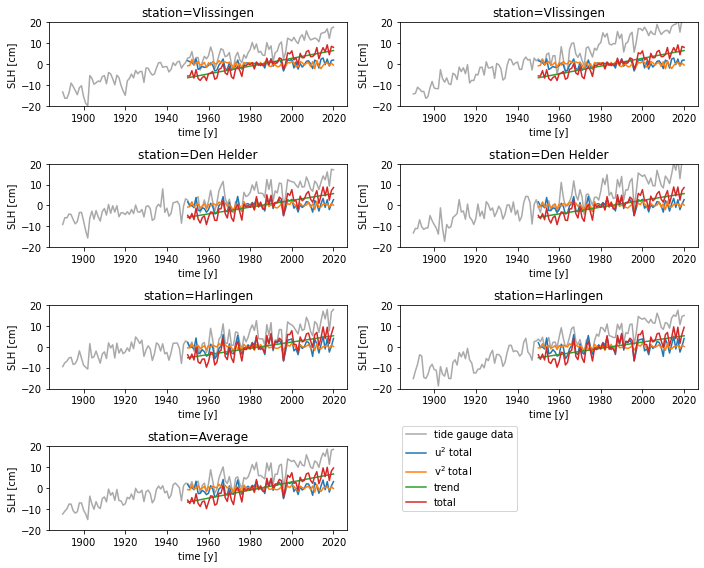

In [210]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_era5, ['u$^2$ total', 'v$^2$ total', 'trend', 'total'], model, data_type)

#### Plot trends

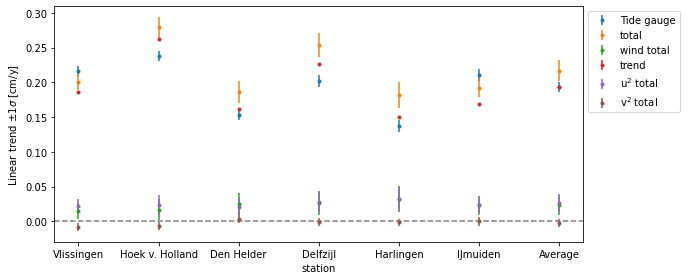

In [211]:
figs.plot_obs_trends_timeseries_per_station(tg_data, timeseries_era5, ['total', 'wind total', 'trend', 'u$^2$ total', 'v$^2$ total'], model, data_type)

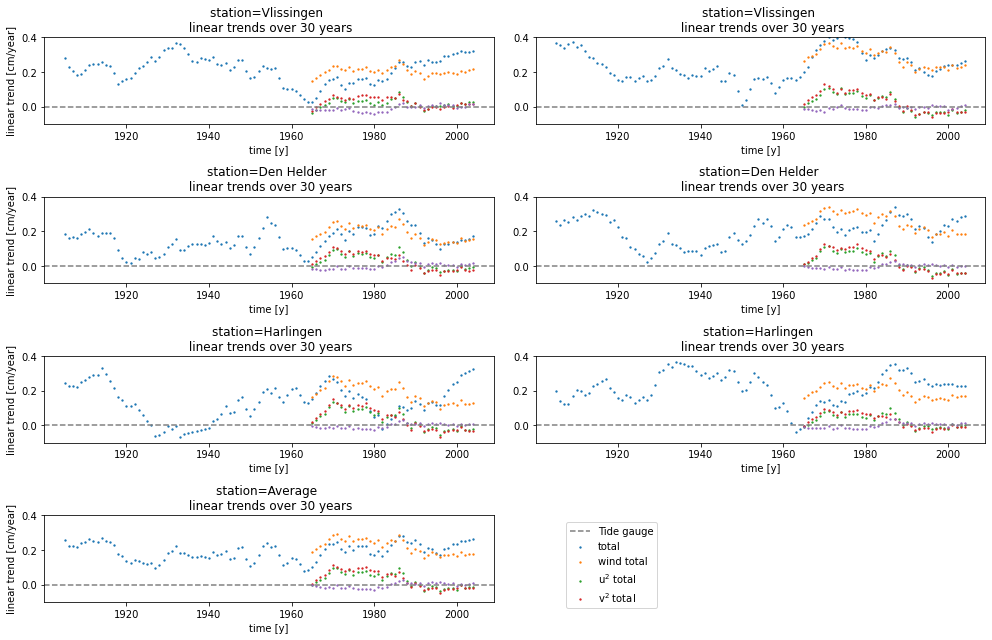

In [212]:
figs.plot_obs_decadal_trends_timeseries_per_station(tg_data, timeseries_era5, ['total', 'wind total', 'u$^2$ total', 'v$^2$ total'], 30, model, data_type, errorbar = False)

## 20cr observational data

In [213]:
data_type = '20cr'

#### Import and plot nearby wind data

In [214]:
wind_data_20cr = imprt.import_obs_wind_data(model = model, data_type = data_type)

In [215]:
wind_data_20cr

Channel                South             Mid-West             \
          u$^2$     v$^2$      u$^2$     v$^2$      u$^2$      v$^2$   
time                                                                   
1836   9.339661 -1.110606   6.401690  0.310869   6.692063  -1.423788   
1837   3.264673  0.735447   2.035330  1.325370   3.044824   1.955889   
1838   0.351915 -0.748255  -0.266823 -0.360828  -1.300336  -1.106671   
1839   4.765925  0.554752   2.080075  0.976965   2.073684   1.277253   
1840   0.849854 -0.191308   4.820944 -0.441465   6.431440  -1.902902   
...         ...       ...        ...       ...        ...        ...   
2011  10.742952  3.004566   8.155463  3.485028  13.435661   6.483733   
2012   9.914115  1.996948   6.809952  2.736764  10.189938   1.982328   
2013   3.260722  1.484737   2.263472  2.715020   5.177427   4.285154   
2014  10.595210  6.510784   5.115736  9.385818   7.802488  13.314934   
2015  10.741358  6.099349  10.573762  5.000158  17.265608   6.761311   

       Mid-East            North-West            North-East             
          u$^2$      v$^2$      u$^2$      v$^2$      u$^2$      v$^2$  
time                                                                    
1836   5.914341  -0.938669   4.039640  -1.211254   2.221467  -1.732220  
1837   1.566807   1.638099   2.953883   2.951589   0.155643   3.296363  
1838  -1.807967  -0.944153  -0.071450   1.847939  -2.106020   0.592806  
1839  -0.375581   1.146095   1.792541   3.554612  -1.421507   3.026562  
1840   8.379648  -2.250757   6.112606  -2.001526   4.964725  -2.783268  
...         ...        ...        ...        ...        ...        ...  
2011  13.715880   5.262648  14.429358  11.633640  10.596898   9.564071  
2012  10.420673   2.108283  10.758274   0.440513   6.598078   2.038419  
2013   5.956827   3.209796   8.885650   7.610978   6.540488   5.776588  
2014   5.428218  11.872807   7.111277  17.830263   0.915726  18.478556  
2015  18.294571   4.461973  18.431528   9.313465  13.466646   8.660346  

[180 rows x 12 columns]

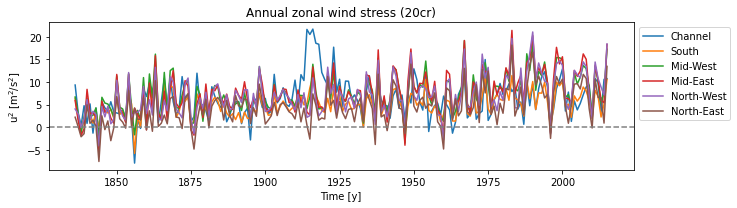

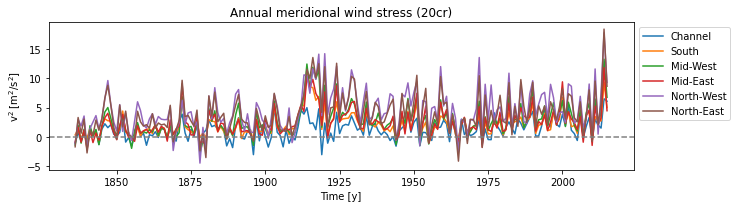

In [216]:
figs.plot_obs_wind_data(wind_data_20cr, model = model, data_type = data_type)

### Perform regression

In [246]:
results_20cr, timeseries_20cr, significance_20cr = regres.regression_obs(wind_data, tg_data, wind_model = model, data_type = data_type)

In [231]:
results_20cr

,R$^2$,R$^2_{wind}$,R$^2_{u^2}$,R$^2_{v^2}$,RMSE,constant,Channel u$^2$,Channel v$^2$,South u$^2$,South v$^2$,Mid-West u$^2$,Mid-West v$^2$,Mid-East u$^2$,Mid-East v$^2$,North-West u$^2$,North-West v$^2$,North-East u$^2$,North-East v$^2$,trend
station,,,,,,,,,,,,,,,,,,,
Vlissingen,0.911336,0.204940,0.079929,0.088252,2.478003,-5.163976,0.527985,1.246891,1.219543,-0.168011,-1.675177,-2.023323,2.034188,0.418726,1.291855,-0.672536,-1.835672,0.807686,10.427907
Hoek v. Holland,0.937649,0.198900,0.096508,0.069529,2.280296,-3.737936,1.273588,1.361546,1.109210,-0.976911,-1.624990,-0.994131,1.856290,0.978821,1.452007,-1.527520,-1.540114,0.741945,11.502890
Den Helder,0.878372,0.350831,0.277422,0.089514,2.201631,-2.501962,0.874432,1.105078,-0.254739,-1.291398,0.814275,1.528302,2.059026,-0.091656,0.802970,-2.740652,-1.883222,1.056085,6.758050
Delfzijl,0.898806,0.413145,0.359586,0.118667,2.533928,-3.699900,0.217369,1.036456,0.900452,1.249303,1.159891,-1.037341,-0.018346,-0.488858,-0.521892,-1.139141,1.252329,0.711289,8.486988
Harlingen,0.851930,0.463210,0.408598,0.108855,2.297653,-1.946051,0.883183,0.870631,1.095934,1.067953,-0.228921,-0.889806,1.195314,-1.327259,0.632284,-1.381636,-0.270883,1.764187,5.543464
IJmuiden,0.893300,0.229059,0.165870,0.091849,2.744129,-5.273881,0.406215,1.355344,1.230609,-1.820865,-0.812639,1.708138,1.520181,0.077493,0.452137,-3.703332,-0.927698,2.131509,10.081427
Average,0.936502,0.309304,0.227420,0.098386,1.878404,-3.720623,0.697144,1.162663,0.883481,-0.323356,-0.394575,-0.284690,1.441125,-0.072105,0.684884,-1.860790,-0.867560,1.202105,8.800128


In [232]:
timeseries_20cr['Average']

,Channel u$^2$,Channel v$^2$,South u$^2$,South v$^2$,Mid-West u$^2$,Mid-West v$^2$,Mid-East u$^2$,Mid-East v$^2$,North-West u$^2$,North-West v$^2$,...,trend,total,wind total,Channel,South,Mid-West,Mid-East,North-West,u$^2$ total,v$^2$ total
time,,,,,,,,,,,,,,,,,,,,,
1836,0.485642,-1.542756,0.446614,0.293557,0.063858,0.422606,-0.454782,0.099070,-0.440633,2.956911,...,-15.157823,-14.317012,0.840812,-1.057113,0.740171,0.486465,-0.355711,2.516277,0.569575,0.271237
1837,-0.488293,-0.307458,-0.918587,0.127511,0.401334,0.074274,-1.774792,0.022382,-0.609546,0.808924,...,-14.988462,-16.977941,-1.989479,-0.795751,-0.791076,0.475608,-1.752410,0.199378,-2.488541,0.499063
1838,-0.955263,-1.300286,-1.638386,0.403496,0.803388,0.389922,-2.799450,0.099234,-1.080201,1.378397,...,-14.819101,-19.300978,-4.481877,-2.255549,-1.234890,1.193311,-2.700217,0.298196,-4.295105,-0.186772
1839,-0.247614,-0.428371,-0.904596,0.184535,0.491193,0.144219,-2.364545,0.037025,-0.790218,0.497771,...,-14.649740,-17.118309,-2.468569,-0.675985,-0.720061,0.635412,-2.327520,-0.292447,-2.584272,0.115702
1840,-0.875434,-0.927602,-0.047627,0.416694,0.087973,0.471987,0.293742,0.138120,-0.118140,3.364684,...,-14.480379,-14.101469,0.378910,-1.803036,0.369067,0.559961,0.431862,3.246544,-0.764894,1.143804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,0.710616,1.210938,0.994955,-0.225967,-0.560121,-0.392397,1.913944,-0.085489,1.175708,-3.670929,...,14.480379,16.198868,1.718490,1.921554,0.768988,-0.952518,1.828455,-2.495221,2.950634,-1.232144
2012,0.577738,0.536684,0.574263,-0.103496,-0.259797,0.071549,0.913444,0.008389,0.604593,2.104615,...,14.649740,18.570639,3.920899,1.114422,0.470766,-0.188248,0.921833,2.709208,1.962900,1.957999
2013,-0.488926,0.193935,-0.847255,-0.099938,0.204006,-0.165796,-0.441882,-0.024393,0.313266,-1.595275,...,14.819101,12.059048,-2.760053,-0.294992,-0.947192,0.038210,-0.466275,-1.282008,-1.696075,-1.063978


In [237]:
significance_20cr.T

reggression_contributor,Channel u$^2$,Channel v$^2$,South u$^2$,South v$^2$,Mid-West u$^2$,Mid-West v$^2$,Mid-East u$^2$,Mid-East v$^2$,North-West u$^2$,North-West v$^2$,North-East u$^2$,North-East v$^2$,trend,total,wind total
Vlissingen,False,True,True,False,True,False,True,False,True,False,True,False,True,True,True
Hoek v. Holland,False,True,True,False,True,False,True,False,True,False,True,False,True,True,True
Den Helder,False,True,True,False,True,False,True,False,True,False,True,False,True,True,True
Delfzijl,False,True,True,False,True,False,True,False,True,False,True,False,True,True,True
Harlingen,True,True,True,True,True,False,True,False,True,False,True,False,True,True,True
IJmuiden,False,True,True,False,True,False,True,False,True,False,True,False,True,True,True
Average,False,True,True,False,True,False,True,False,True,False,True,False,True,True,True


In [242]:
import xarray as xr
test = xr.Dataset.from_dataframe(significance_20cr.T).rename({'index':'station'})

In [243]:
test

<xarray.Dataset>
Dimensions:           (station: 7)
Coordinates:
  * station           (station) object 'Vlissingen' ... 'Average'
Data variables:
    Channel u$^2$     (station) bool False False False False True False False
    Channel v$^2$     (station) bool True True True True True True True
    South u$^2$       (station) bool True True True True True True True
    South v$^2$       (station) bool False False False False True False False
    Mid-West u$^2$    (station) bool True True True True True True True
    Mid-West v$^2$    (station) bool False False False False False False False
    Mid-East u$^2$    (station) bool True True True True True True True
    Mid-East v$^2$    (station) bool False False False False False False False
    North-West u$^2$  (station) bool True True True True True True True
    North-West v$^2$  (station) bool False False False False False False False
    North-East u$^2$  (station) bool True True True True True True True
    North-East v$^2$  (station) bool False False False False False False False
    trend             (station) bool True True True True True True True
    total             (station) bool True True True True True True True
    wind total        (station) bool True True True True True True True

#### Plot regression results

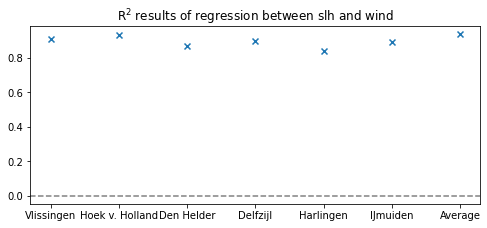

In [221]:
figs.plot_obs_result_per_station(results_20cr, 'R$^2$', model, data_type)

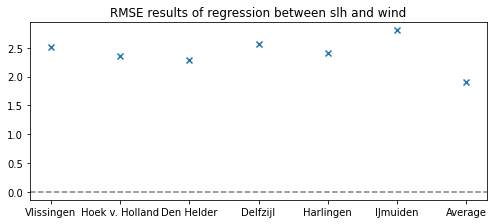

In [222]:
figs.plot_obs_result_per_station(results_20cr, 'RMSE', model, data_type)

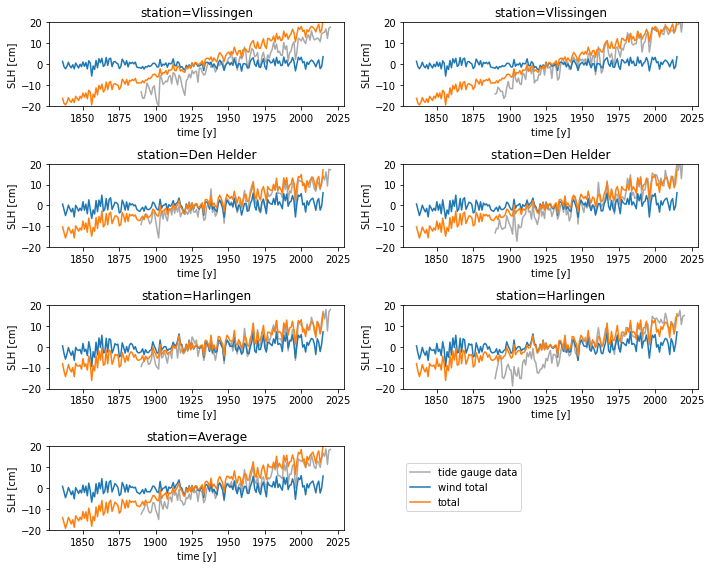

In [223]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_20cr, ['wind total', 'total'], model, data_type)

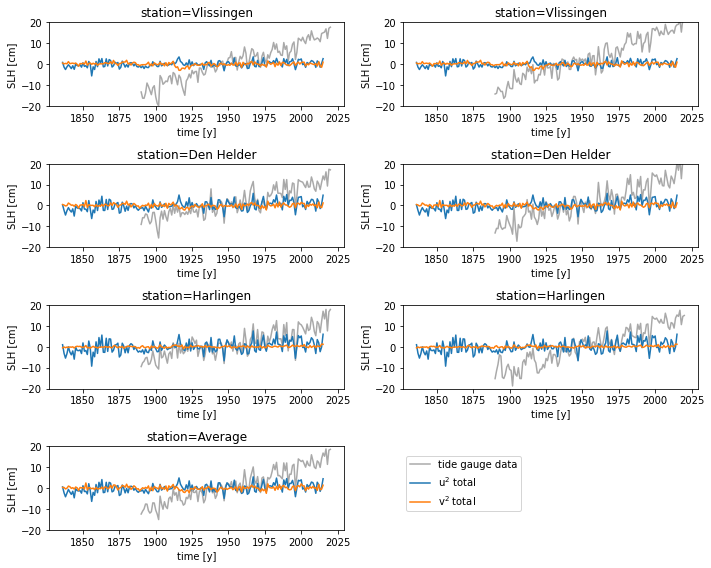

In [224]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_20cr, ['u$^2$ total', 'v$^2$ total'], model, data_type)

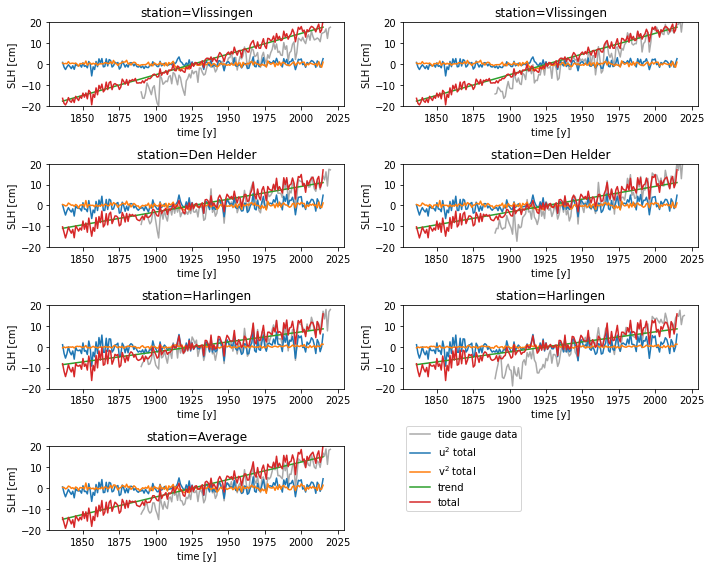

In [225]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_20cr, ['u$^2$ total', 'v$^2$ total', 'trend', 'total'], model, data_type)

#### Plot trends

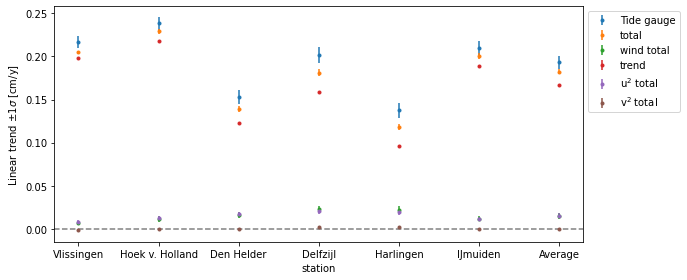

In [226]:
figs.plot_obs_trends_timeseries_per_station(tg_data, timeseries_20cr, ['total', 'wind total', 'trend', 'u$^2$ total', 'v$^2$ total'], model, data_type)

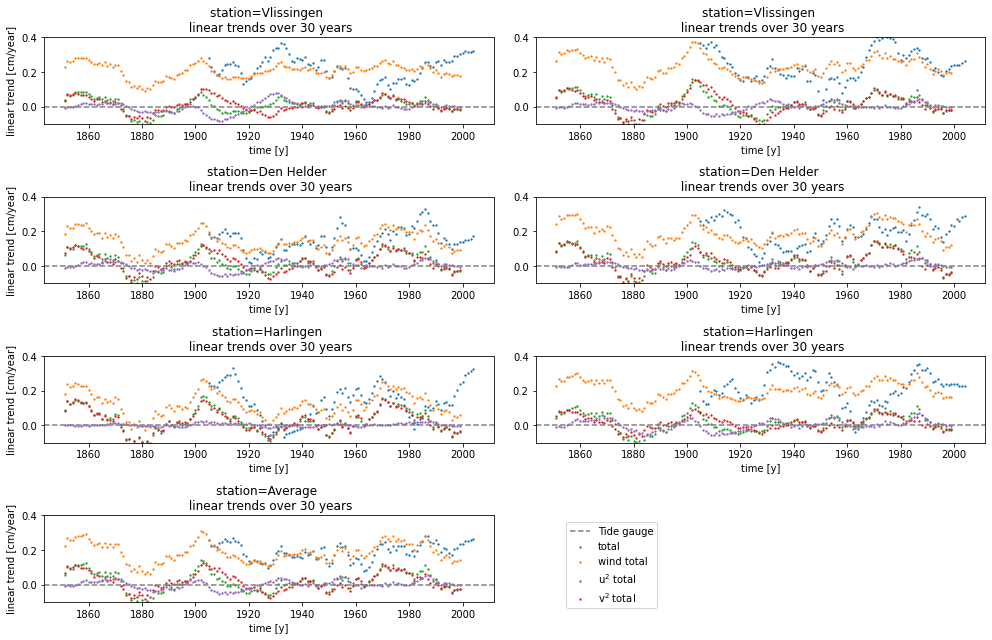

In [227]:
figs.plot_obs_decadal_trends_timeseries_per_station(tg_data, timeseries_20cr, ['total', 'wind total', 'u$^2$ total', 'v$^2$ total'], 30, model, data_type, errorbar = False)